In [74]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import re
import nltk
from nltk.corpus import stopwords
import string 
from string import punctuation
%matplotlib inline

In [75]:
nltk.download("stopwords")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [76]:
df = pd.read_csv ('all_games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          18800 non-null  object
 1   platform      18800 non-null  object
 2   release_date  18800 non-null  object
 3   summary       18686 non-null  object
 4   meta_score    18800 non-null  int64 
 5   user_review   18800 non-null  object
dtypes: int64(1), object(5)
memory usage: 881.4+ KB


In [77]:
print(df.columns.values)

['name' 'platform' 'release_date' 'summary' 'meta_score' 'user_review']


In [78]:
df.head()

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


In [79]:
df.tail()

,name,platform,release_date,summary,meta_score,user_review
18795,Fast & Furious: Showdown,Xbox 360,"May 21, 2013",Fast & Furious: Showdown takes some of the fra...,22,1.3
18796,Drake of the 99 Dragons,Xbox,"November 3, 2003",Drake is out for revenge in a supernatural Hon...,22,1.7
18797,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"September 22, 2015","Head out on a journey of redemption, driven by...",21,2.9
18798,Infestation: Survivor Stories (The War Z),PC,"October 15, 2012","(Formerly known as ""The War Z"") It has been 5 ...",20,1.7
18799,Leisure Suit Larry: Box Office Bust,PC,"March 31, 2009",The Leisure Suit Larry: Box Office Bust video ...,20,2.0


In [80]:
df = df.drop(['meta_score',], axis=1)

In [81]:
df.dropna(inplace = True)

In [82]:
df.drop_duplicates(inplace = True)

In [83]:
df.describe(include=['O'])

,name,platform,release_date,summary,user_review
count,18685,18685,18685,18685,18685
unique,12159,22,4522,14647,94
top,Madden NFL 07,PC,"November 14, 2006",Need for Speed ProStreet accelerates street ra...,tbd
freq,9,4828,48,7,1344


In [84]:
df.groupby(by=["platform"], dropna=False).count()

,name,release_date,summary,user_review
platform,,,,
3DS,394,394,394,394
DS,718,718,718,718
Dreamcast,125,125,125,125
Game Boy Advance,433,433,433,433
GameCube,448,448,448,448
Nintendo 64,71,71,71,71
PC,4828,4828,4828,4828
PSP,509,509,509,509
PlayStation,186,186,186,186


In [85]:
df.isnull()

,name,platform,release_date,summary,user_review
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
18795,False,False,False,False,False
18796,False,False,False,False,False
18797,False,False,False,False,False
18798,False,False,False,False,False


In [86]:
df.isnull().any()

name            False
platform        False
release_date    False
summary         False
user_review     False
dtype: bool

In [87]:
import datetime
df['year']=pd.DatetimeIndex(df['release_date']).year

In [88]:
print("\n\033[1m Number of games and platforms based on year\033[0m")
print("_"*50)
df[['year','name','platform']].groupby(by=["year"], dropna=False).count()


 Number of games and platforms based on year
__________________________________________________


,name,platform
year,,
1995,1,1
1996,20,20
1997,28,28
1998,45,45
1999,53,53
2000,354,354
2001,540,540
2002,778,778
2003,799,799


In [89]:
print("\n\033[1mBasic Statistic (year 1995-2021)\033[0m")
print("_"*70)
print("\nNumber of games:", df["name"].nunique(),"unique games")
print("\nNumber of gaming platforms:", df["platform"].nunique(), "unique gaming platforms")


Basic Statistic (year 1995-2021)
______________________________________________________________________

Number of games: 12159 unique games

Number of gaming platforms: 22 unique gaming platforms


In [90]:
pie= df.groupby(['platform']).size().to_frame('count').reset_index()
pie.sort_values(by='count', ascending=False)[:10]
fig = px.pie(pie, values='count', names='platform', title="Percentage of Games Released in Each Platform")
fig.show()

Text(-1.6999999999999993, 0.5, 'Games')

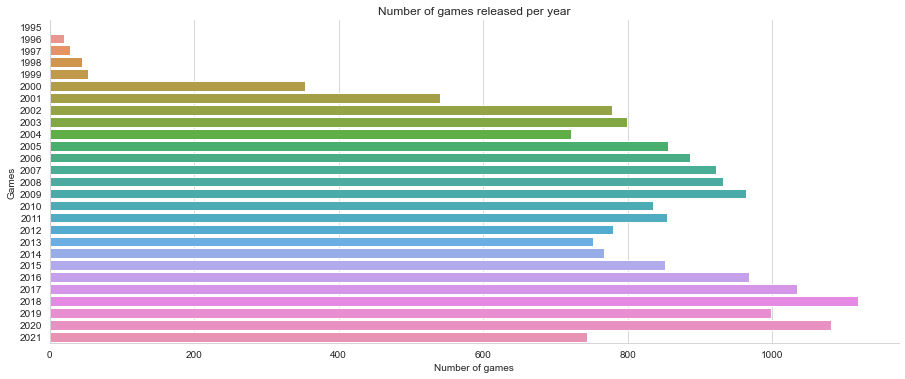

In [91]:
sns.catplot(y="year", kind="count", data=df, height=5, aspect=2.5)
plt.title("Number of games released per year")
plt.xlabel("Number of games")
plt.ylabel("Games")

In [92]:
df = df[df.user_review != "tbd"]
df

,name,platform,release_date,summary,user_review,year
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",9.1,1998
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,7.4,2000
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,7.7,2008
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",8.4,1999
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,7.9,2008
...,...,...,...,...,...,...
18795,Fast & Furious: Showdown,Xbox 360,"May 21, 2013",Fast & Furious: Showdown takes some of the fra...,1.3,2013
18796,Drake of the 99 Dragons,Xbox,"November 3, 2003",Drake is out for revenge in a supernatural Hon...,1.7,2003
18797,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"September 22, 2015","Head out on a journey of redemption, driven by...",2.9,2015
18798,Infestation: Survivor Stories (The War Z),PC,"October 15, 2012","(Formerly known as ""The War Z"") It has been 5 ...",1.7,2012


In [93]:
# convert column "user_review" of a DataFrame from object to numeric
df["user_review"] = pd.to_numeric(df["user_review"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17341 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          17341 non-null  object 
 1   platform      17341 non-null  object 
 2   release_date  17341 non-null  object 
 3   summary       17341 non-null  object 
 4   user_review   17341 non-null  float64
 5   year          17341 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 948.3+ KB


In [94]:
df['Polarity_Rating'] = df['user_review'].apply(lambda x: 'Positive' if x > 6 else('Neutral' if x ==5&6 else 'Negative'))
df


,name,platform,release_date,summary,user_review,year,Polarity_Rating
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",9.1,1998,Positive
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,7.4,2000,Positive
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,7.7,2008,Positive
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",8.4,1999,Positive
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,7.9,2008,Positive
...,...,...,...,...,...,...,...
18795,Fast & Furious: Showdown,Xbox 360,"May 21, 2013",Fast & Furious: Showdown takes some of the fra...,1.3,2013,Negative
18796,Drake of the 99 Dragons,Xbox,"November 3, 2003",Drake is out for revenge in a supernatural Hon...,1.7,2003,Negative
18797,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"September 22, 2015","Head out on a journey of redemption, driven by...",2.9,2015,Negative
18798,Infestation: Survivor Stories (The War Z),PC,"October 15, 2012","(Formerly known as ""The War Z"") It has been 5 ...",1.7,2012,Negative


In [95]:
print("\n\033[1m Number of games and platforms based on polarity rating\033[0m")
print("_"*70)
df[['Polarity_Rating','name','platform']].groupby(by=["Polarity_Rating"], dropna=False).count()


 Number of games and platforms based on polarity rating
______________________________________________________________________


,name,platform
Polarity_Rating,,
Negative,3408,3408
Neutral,65,65
Positive,13868,13868


Text(0.5, 1.0, 'Polarity Rating And Its Count For Game Reviews')

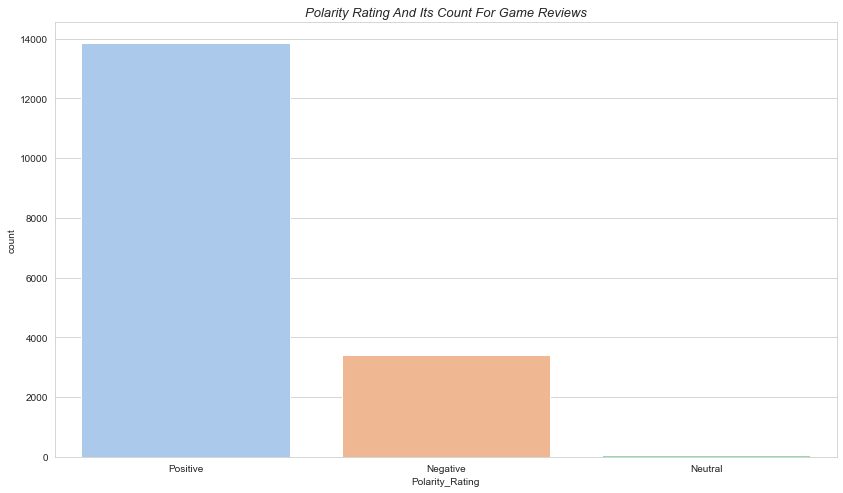

In [96]:
%matplotlib inline
fig = plt.figure(figsize = (14, 8))
sns.set_style('whitegrid')
sns.countplot(x='Polarity_Rating',data=df, palette = "pastel")
plt.title("Polarity Rating And Its Count For Game Reviews", fontsize=13, fontstyle='oblique')

In [97]:
def get_text_processing(text):
 stpword = stopwords.words('english')
 no_punctuation = [char for char in text if char not in string.punctuation]
 no_punctuation = ''.join(no_punctuation)
 return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

In [98]:
df['New_Summary']=df['summary'].apply(get_text_processing)
df.head()

,name,platform,release_date,summary,user_review,year,Polarity_Rating,New_Summary
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",9.1,1998,Positive,young boy Link tricked Ganondorf King Gerudo T...
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,7.4,2000,Positive,major publishers development efforts shift num...
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,7.7,2008,Positive,Metacritics 2008 PS3 Game Year Also known GTA ...
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",8.4,1999,Positive,tale souls swords transcending world history t...
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,7.9,2008,Positive,Metacritics 2008 Xbox 360 Game Year Also known...


In [99]:
top_user_score = df.sort_values(['user_review'], ascending=False)[:10]
top_user_score[['name','user_review']]

,name,user_review
3504,Z.H.P. Unlosing Ranger vs Darkdeath Evilman,9.7
9550,After Burner Climax,9.7
2450,Ghost Trick: Phantom Detective,9.7
4844,GrimGrimoire,9.7
14836,Metal Torrent,9.7
4953,Rochard,9.7
10936,Tengami,9.7
12434,Crystar,9.6
7638,Superliminal,9.6
4573,Superliminal,9.6


Text(0, 0.5, 'Name')

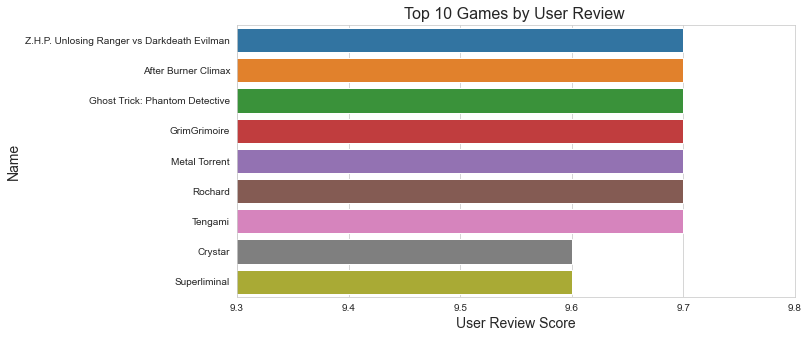

In [100]:
fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(x = top_user_score['user_review'], y = top_user_score['name'])
plt.xlim(9.3,9.8)
plt.title('Top 10 Games by User Review ', fontsize = 16)
plt.xlabel('User Review Score', fontsize = 14)
plt.ylabel('Name', fontsize = 14)

In [101]:
bottom_user_score = df.sort_values(['user_review'], ascending=True)[:10]
bottom_user_score[['name','user_review']]

,name,user_review
14510,Madden NFL 21,0.2
11261,Madden NFL 21,0.5
12336,Madden NFL 22,0.5
10858,Madden NFL 22,0.6
15693,Warcraft III: Reforged,0.6
18227,FIFA 20: Legacy Edition,0.7
11864,NBA 2K21,0.8
9616,FIFA 21,0.8
5282,Tom Clancy's The Division 2: Warlords of New York,0.9
10868,The Sims 4: Star Wars - Journey to Batuu,1.0


Text(0, 0.5, 'Name')

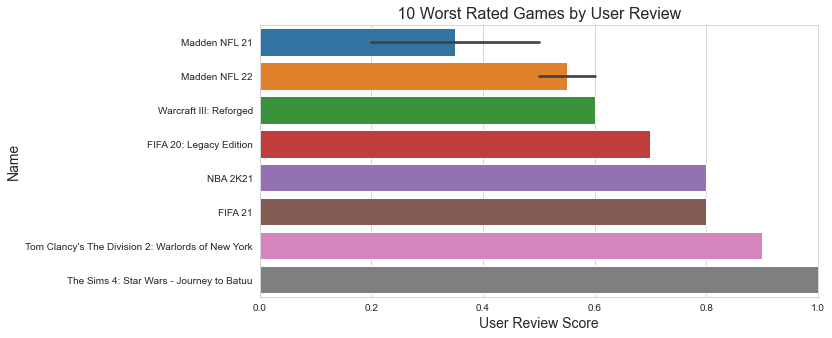

In [102]:
fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(x = bottom_user_score['user_review'], y = bottom_user_score['name'])
plt.xlim(0,1.0)
plt.title(' 10 Worst Rated Games by User Review ', fontsize = 16)
plt.xlabel('User Review Score', fontsize = 14)
plt.ylabel('Name', fontsize = 14)

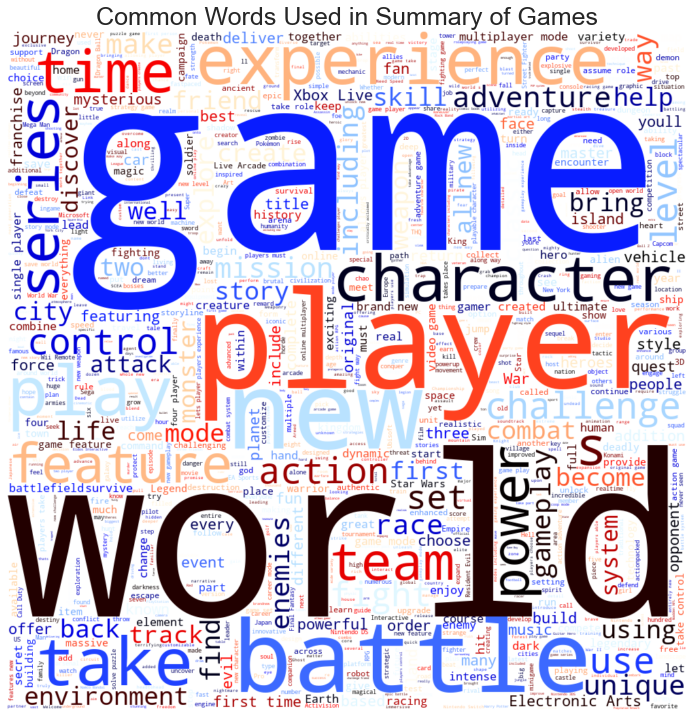

In [103]:
df['New_Summary']=df['New_Summary'].astype('str')
New_Summary= " ".join(txt for txt in df.New_Summary)
stopwords = set(STOPWORDS)
stopwords.update(["one", "go", "day","u","even"])
wc = WordCloud(stopwords=stopwords,background_color='white', mode='RGB',
               width=1000, max_words=1000, height=1000,
               random_state=1, contour_width=1, contour_color='black',colormap='flag')
wc.generate(New_Summary)
plt.figure(figsize=(20, 10))
plt.title("Common Words Used in Summary of Games", fontsize = 25)
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

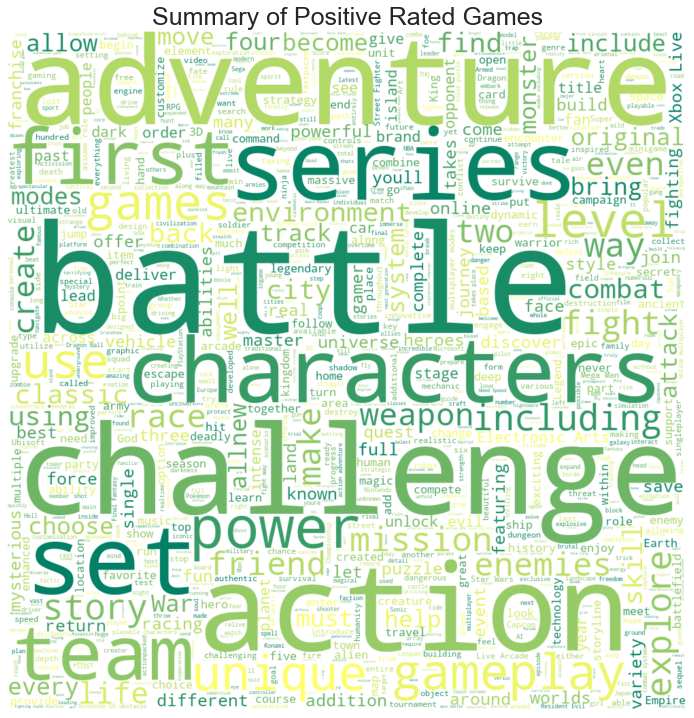

In [108]:
df_like=df.loc[df['Polarity_Rating']=='Positive']
New_Summary = " ".join(insul for insul in df_like.New_Summary)
stopwords = set(STOPWORDS)
stopwords.update(["game", "player", "world","play","new","time","players","feature","character","one","features", "experience","take","s","control","mode"])
wc = WordCloud(stopwords=stopwords,background_color='white', 
               width=1000, max_words=1000, height=1000,
               random_state=1, contour_width=1, contour_color='green',colormap='summer')
wc.generate(New_Summary)
plt.figure(figsize=(20, 10))
plt.title("Summary of Positive Rated Games", fontsize = 25)
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

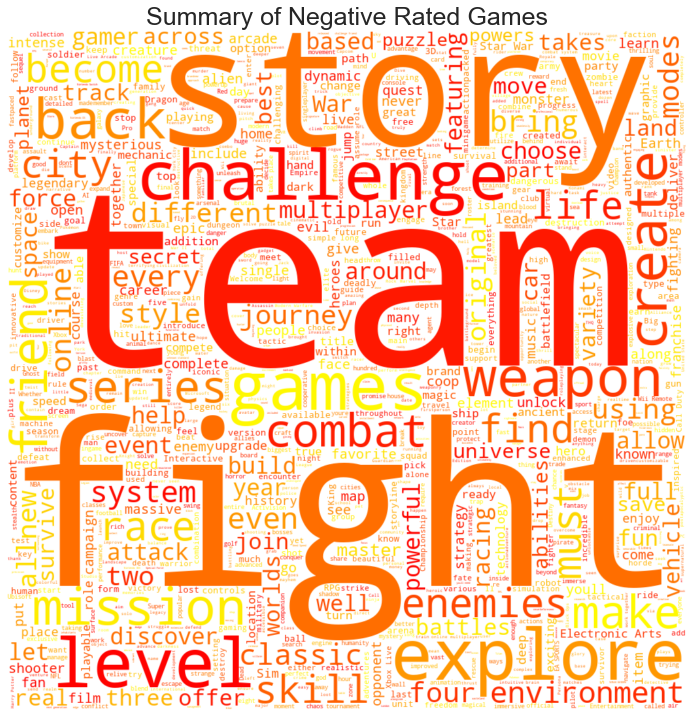

In [107]:
df_like=df.loc[df['Polarity_Rating']=='Negative']
New_Summary = " ".join(insul for insul in df_like.New_Summary)
stopwords = set(STOPWORDS)
stopwords.update(["game", "player", "world","play","new","time","players","battle","take","character","experience","s","one","adventure","feature","control","including","features","mode","action","set","unique","characters","gameplay","use","first","power","way"])
wc = WordCloud(stopwords=stopwords,background_color='white', 
               width=1000, max_words=1000, height=1000,
               random_state=1, contour_width=1, contour_color='black',colormap='autumn')
wc.generate(New_Summary)
plt.figure(figsize=(20, 10))
plt.title("Summary of Negative Rated Games", fontsize = 25)
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

In [106]:
from IPython.display import HTML
HTML("<h1><center>Summary of Games Dataframe<center></h1>")